<a href="https://colab.research.google.com/github/rhysdavies21/library/blob/master/omega_v4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Comparing the Omega Measure across asset class**

---



**1. Load libraries and input**

In [1]:
pip install yfinance --upgrade --no-cache-dir

Requirement already up-to-date: yfinance in /usr/local/lib/python3.6/dist-packages (0.1.49)


In [0]:
# Import libraries
import pandas as pd
import yfinance as yf
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
# Create class of formats
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [4]:
# Choose inputs
assets = '^FTSE ^GSPC HISFX AAPL ^N225 ^HSI'
start_date = '2016-01-01'
end_date = '2019-10-24'

# Generate inputs
#assets = str(input("Choose tickers (string format with space between tickers) "))
#start_date = str(input("Choose start date (yyyy-mm-dd) "))
#end_date = str(input("Choose end date (yyyy-mm-dd) "))

# Display inputs
print(color.BOLD+'assets :'+color.END, type(assets), assets)
print(color.BOLD+'start_date: '+color.END, type(start_date), start_date)
print(color.BOLD+'end_date: '+color.END, type(end_date), end_date)

assets : <class 'str'> ^FTSE ^GSPC HISFX AAPL ^N225 ^HSI
start_date:  <class 'str'> 2016-01-01
end_date:  <class 'str'> 2019-10-24


**2. Import and process and review historical data**

In [5]:
# Import data
raw_data = yf.download(assets, start_date, end_date)

# Review data
print('\n', color.BOLD+'Review dataframe of input data - head:'+color.END)
display(raw_data['Adj Close'].head())

print('\n', color.BOLD+'Review dataframe of input data - tail:'+color.END)
display(raw_data['Adj Close'].tail())

print('\n',color.BOLD+'Review shape of raw_data: '+color.END, raw_data.shape)

[*********************100%***********************]  6 of 6 completed

 Review dataframe of input data - head:


,AAPL,HISFX,^FTSE,^GSPC,^HSI,^N225
Date,,,,,,
2016-01-04,98.742249,9.720344,6093.399902,2012.660034,21327.119141,18450.980469
2016-01-05,96.267815,9.757700,6137.200195,2016.709961,21188.720703,18374.000000
2016-01-06,94.383888,9.735286,6073.399902,1990.260010,20980.810547,18191.320312
2016-01-07,90.400467,9.541029,5954.100098,1943.089966,20333.339844,17767.339844
2016-01-08,90.878479,9.414014,5912.399902,1922.030029,20453.710938,17697.960938



 Review dataframe of input data - tail:


,AAPL,HISFX,^FTSE,^GSPC,^HSI,^N225
Date,,,,,,
2019-10-18,236.410004,12.60,7150.600098,2986.199951,26719.580078,22492.679688
2019-10-21,240.509995,12.75,7163.600098,3006.719971,26725.679688,22548.900391
2019-10-22,239.960007,12.80,7212.500000,2995.989990,26786.199219,NaN
2019-10-23,243.179993,12.78,7260.700195,3004.520020,26566.730469,22625.380859
2019-10-24,NaN,NaN,7328.299805,NaN,26797.949219,22750.599609



 Review shape of raw_data:  (991, 36)


In [6]:
# Change into performance metric
new_df = raw_data['Adj Close'].pct_change(periods=1)   # Calculate performance: (data_adjclose['asset'][1] / data_adjclose['asset'][0] ) -1

# Create asset_list
asset_list = list(new_df.columns)[0:]

# Review data
print('\n', color.BOLD+'Review dataframe of performance data - head:'+color.END)
display(new_df.head(3))

print('\n', color.BOLD+'Review dataframe of performance data - tail:'+color.END)
display(new_df.tail(3))

print('\n',color.BOLD+'Review shape of new_df: '+color.END, new_df.shape)
print('\n', color.BOLD+'asset_list: '+color.END, asset_list)


 Review dataframe of performance data - head:


,AAPL,HISFX,^FTSE,^GSPC,^HSI,^N225
Date,,,,,,
2016-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-05,-0.02506,0.003843,0.007188,0.002012,-0.006489,-0.004172
2016-01-06,-0.01957,-0.002297,-0.010396,-0.013115,-0.009812,-0.009942



 Review dataframe of performance data - tail:


,AAPL,HISFX,^FTSE,^GSPC,^HSI,^N225
Date,,,,,,
2019-10-22,-0.002287,0.003922,0.006826,-0.003569,0.002264,0.000000
2019-10-23,0.013419,-0.001563,0.006683,0.002847,-0.008193,0.003392
2019-10-24,0.000000,0.000000,0.009310,0.000000,0.008703,0.005534



 Review shape of new_df:  (991, 6)

 asset_list:  ['AAPL', 'HISFX', '^FTSE', '^GSPC', '^HSI', '^N225']


**3. Define calc_function to calculate and illustrate Omega by asset and threshold**

In [0]:
# Input threshold_list as a list of threshold values
# calc_omega is function to create omega by asset for a given input of threshold
# Inner loops over asset to calculate omega for some threshold. Then outer loop to calculate list of (list) omegas by asset for varying thresholds

def calc_omega(threshold_list):
 # import matplotlib
  
  update_new_df = new_df        # new dataframe to include gains, losses and omegas
  omega_by_asset = []           # list of (lists) omega outputs by underlying asset for particular threshold
  col_threshold =[]             # column of threshold values

  for t in threshold_list:
    threshold = t

    vec_assets = []             # vector of assets for some threshold
    vec_losses = []             # vector of losses for some threshold
    vec_gains = []              # vector of gains for some threshold
    vec_omega = []              # vector of omegas for some threshold

    for a in asset_list:
      
      update_new_df['loss_col_'+a]= update_new_df[a].apply(lambda x: float(1) if x < threshold else float(0)) * (threshold - update_new_df[a])
      update_new_df['gain_col_'+a]= update_new_df[a].apply(lambda x: float(1) if x > threshold else float(0)) * (update_new_df[a] - threshold)

      vec_assets.append(a)
      vec_losses.append(sum(update_new_df['loss_col_'+a][1:]))
      vec_gains.append(sum(update_new_df['gain_col_'+a][1:]))
      vec_omega.append(vec_gains[asset_list.index(a)] / vec_losses[asset_list.index(a)])

    omega_by_asset.append(vec_omega)
    col_threshold.append(t) 
   
  output_df = pd.DataFrame(columns=asset_list[:], data=omega_by_asset)
  output_df['Omega_Heading'] = col_threshold
  output_df.set_index('Omega_Heading', inplace=True)

  display(output_df)
  
  output_df.plot()
  
  return   

**4. Run the calculation**

,AAPL,HISFX,^FTSE,^GSPC,^HSI,^N225
Omega_Heading,,,,,,
0.00,1.219559,1.087057,1.078870,1.177010,1.079019,1.075244
0.01,0.193597,0.091062,0.044382,0.042458,0.080698,0.100905
0.02,0.043366,0.009066,0.004009,0.003567,0.007667,0.017510
0.03,0.013879,0.000693,0.000236,0.000817,0.000897,0.005039
0.04,0.004435,0.000014,0.000000,0.000245,0.000054,0.001997


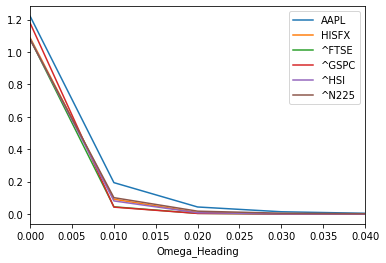

In [8]:
# Run function for some given input
calc_omega([0, 0.01, 0.02, 0.03, 0.04])